In [331]:
import pandas as pd

#load the data
url = "https://raw.githubusercontent.com/saugat977/DAV-6150/refs/heads/main/M6/Project1_Data.csv"
df = pd.read_csv(url)
print(df.shape)
df.head(20)

(73152, 29)


report_school_year  aggregation_index aggregation_type  \
0             2018-19                  3         District   
1             2018-19                  3         District   
2             2018-19                  3         District   
3             2018-19                  3         District   
4             2018-19                  3         District   
5             2018-19                  3         District   
6             2018-19                  3         District   
7             2018-19                  3         District   
8             2018-19                  3         District   
9             2018-19                  3         District   
10            2018-19                  3         District   
11            2018-19                  3         District   
12            2018-19                  3         District   
13            2018-19                  3         District   
14            2018-19                  3         District   
15            2018-19                  3         District   
16            2018-19                  3         District   
17            2018-19                  3         District   
18            2018-19                  3         District   
19            2018-19                  3         District   

               aggregation_name  nrc_code                   nrc_desc  \
0   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
5   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
6   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
7   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
8   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
9   ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
10  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
11  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
12  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
13  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
14  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
15  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
16  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
17  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
18  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
19  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

    county_code county_name  nyc_ind                     membership_desc  ...  \
0             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
5             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
6             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
7             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
8             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
9             1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
10            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
11            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
12            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
13            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  

In [332]:
# Columns to convert to numeric (all _cnt and _pct columns)
numeric_cols = [
    'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt',
    'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt',
    'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct',
    'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct'
]
# Convert count columns (replace '-' with None, convert to float)
count_cols = [col for col in numeric_cols if col.endswith('_cnt')]
for col in count_cols:
    df[col] = df[col].replace('-', None).astype('float')

# Convert percentage columns (replace '-' with None, remove '%', convert to float)
pct_cols = [col for col in numeric_cols if col.endswith('_pct')]
for col in pct_cols:
    df[col] = df[col].replace('-', None).str.rstrip('%').astype('float')

# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

# EDA

### report_school_year

In [333]:
# report_school_year
df['report_school_year'].describe()

count       73152
unique          1
top       2018-19
freq        73152
Name: report_school_year, dtype: object

Here, all the values are 2018-19 so we can exclude this column as it will not impact our model.

## aggregation_index

In [334]:
#aggregation_index
df['aggregation_index'].describe()

count    73152.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: aggregation_index, dtype: float64

Here, all the values are 3.0 and we can exclude this column too like for report_school_year

## aggregation_type

In [335]:
#aggregation_type
df['aggregation_type'].describe()

count        73152
unique           1
top       District
freq         73152
Name: aggregation_type, dtype: object

Same as report_school_year, we will be excluding this column

## Aggregation_name

In [336]:
#aggregation_name
school_districts = df['aggregation_name']
school_districts.describe()

count                             73152
unique                              680
top       KINGSTON CITY SCHOOL DISTRICT
freq                                138
Name: aggregation_name, dtype: object

There are 680 unique nominal categorical values in this column. This column is not present on the data dictionary but can be relevant for analysis.

In [337]:
district_counts = school_districts.value_counts()
district_counts

aggregation_name
KINGSTON CITY SCHOOL DISTRICT                                   138
WILLIAMSVILLE CENTRAL SCHOOL DISTRICT                           136
GREECE CENTRAL SCHOOL DISTRICT                                  134
RIVERHEAD CENTRAL SCHOOL DISTRICT                               134
KENMORE-TONAWANDA UNION FREE SCHOOL DISTRICT                    134
MIDDLETOWN CITY SCHOOL DISTRICT                                 134
ROCHESTER CITY SCHOOL DISTRICT                                  134
ALBANY CITY SCHOOL DISTRICT                                     132
NEWBURGH CITY SCHOOL DISTRICT                                   132
SYRACUSE CITY SCHOOL DISTRICT                                   132
ROME CITY SCHOOL DISTRICT                                       132
RUSH-HENRIETTA CENTRAL SCHOOL DISTRICT                          132
VALLEY CENTRAL SCHOOL DISTRICT (MONTGOMERY)                     132
GATES-CHILI CENTRAL SCHOOL DISTRICT                             132
WEST SENECA CENTRAL SCHOOL DIST

Here, the counts of districts range from 40 to 138 which is good spread for performing analysis.

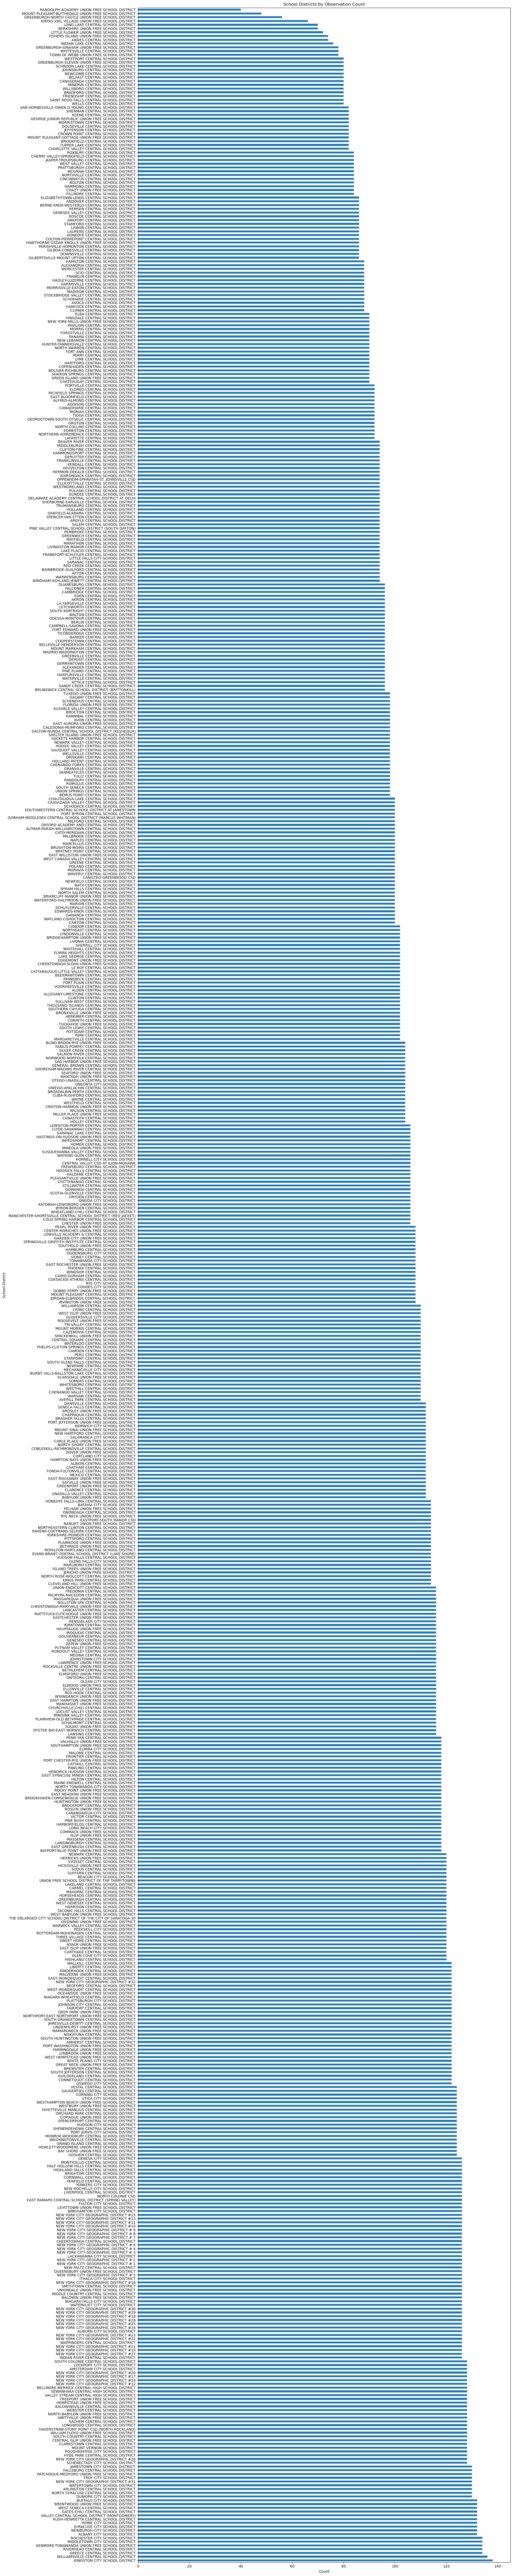

In [338]:
# creating barchart to further analyse
import matplotlib.pyplot as plt

# Create bar chart
plt.figure(figsize=(20, 100))
district_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('School District')
plt.title('School Districts by Observation Count')
plt.tight_layout()
plt.show()

The bar chart further satisfies the claim of evenly spread observations for districts.

## nrc_code

In [339]:
#nrc_code
df['nrc_code'].describe()


count    73152.000000
mean         4.588583
std          1.203507
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: nrc_code, dtype: float64

In [340]:
print(df['nrc_code'].isnull().sum())
mapping = df['nrc_code'].unique()
print(mapping)

0
[3 5 6 4 2 1]


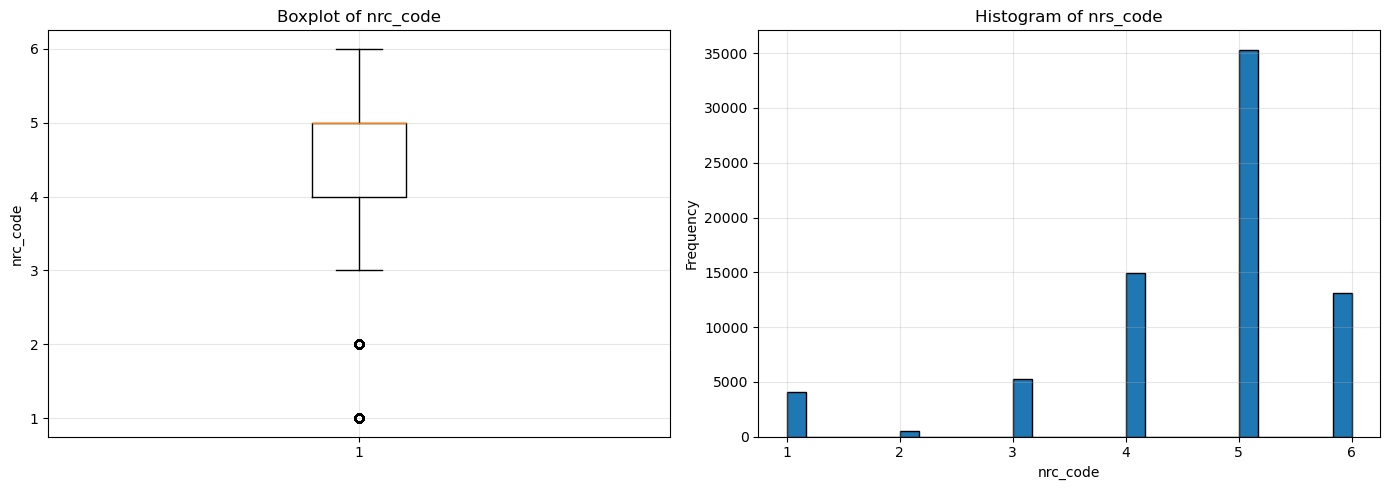

In [341]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df['nrc_code'])
axes[0].set_ylabel('nrc_code')
axes[0].set_title('Boxplot of nrc_code')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['nrc_code'], bins=30, edgecolor='black')
axes[1].set_xlabel('nrc_code')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of nrs_code')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The nrc code has values from 1 to 6 and is left skewed as per the histogram.

## nrc_desc

In [342]:
#nrc_desc
df['nrc_desc'].describe()


count             73152
unique                6
top       Average Needs
freq              35322
Name: nrc_desc, dtype: object

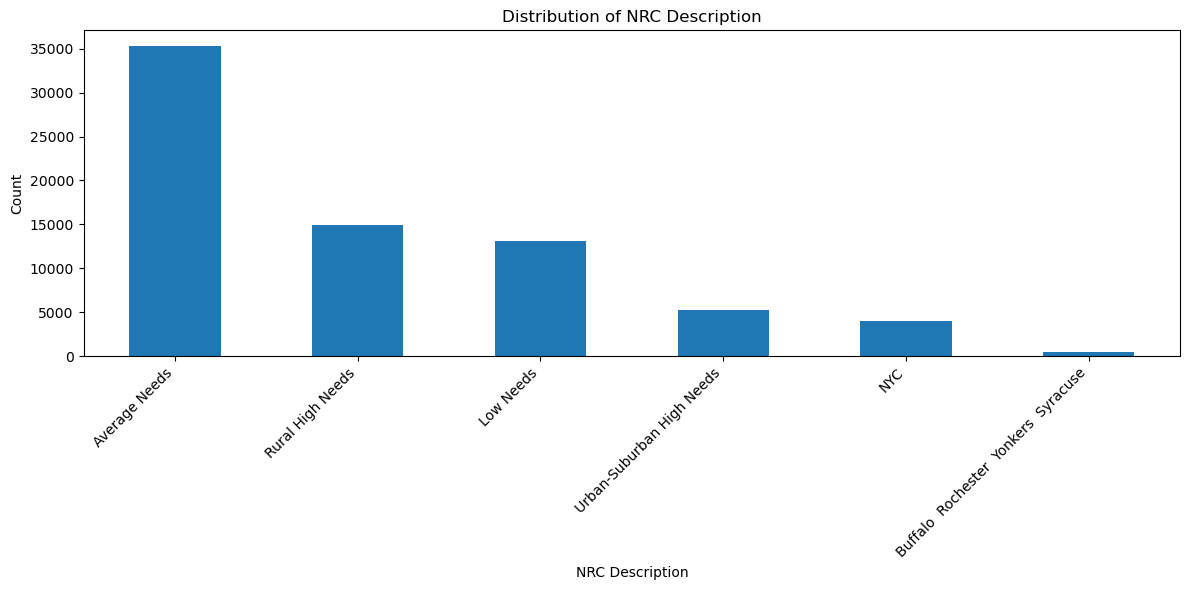

In [343]:
 # Create bar chart for nrc_desc
nrc_desc_counts = df['nrc_desc'].value_counts()
plt.figure(figsize=(12, 6))
nrc_desc_counts.plot(kind='bar')
plt.xlabel('NRC Description')
plt.ylabel('Count')
plt.title('Distribution of NRC Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [344]:
print(df['nrc_desc'].unique())

['Urban-Suburban High Needs' 'Average Needs' 'Low Needs'
 'Rural High Needs' 'Buffalo  Rochester  Yonkers  Syracuse' 'NYC']


## nrc_code & nrc_desc

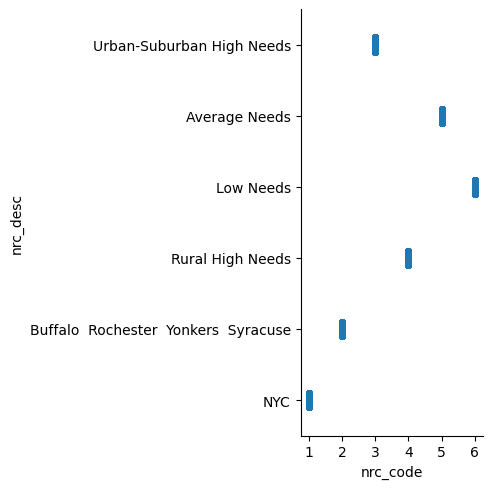

In [345]:
import seaborn as sns
sns.catplot(data=df, x="nrc_code", y="nrc_desc", kind='strip')
plt.xticks([1, 2, 3, 4, 5, 6])  # Force ticks at each integer
plt.show()

Here, the nrc_code and nrc_desc represent the same thing and categorical column is nominal. We will keep the nrc_desc column and drop the nrc_code and then perform one_hot encoding for use on the model.

## county_code

In [346]:
#county_code
df['county_code'].describe()


count    73152.000000
mean        36.251859
std         20.588044
min          1.000000
25%         17.000000
50%         40.000000
75%         57.000000
max         68.000000
Name: county_code, dtype: float64

In [347]:
print(df['county_code'].nunique())
df['county_code'].unique()


62


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])

There are 62 unique county codes

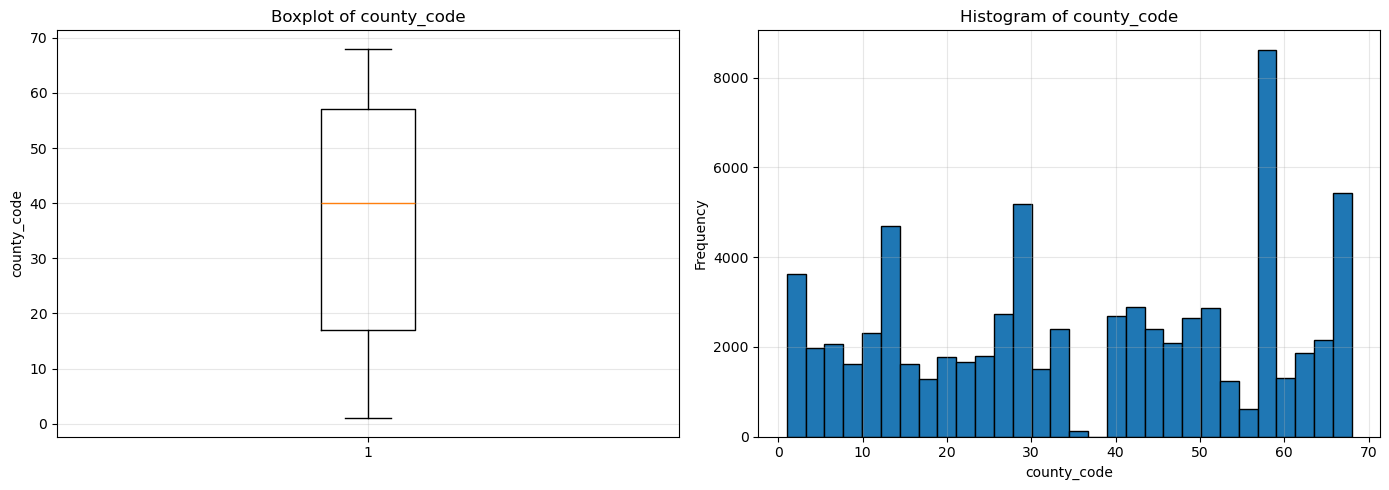

In [348]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df['county_code'])
axes[0].set_ylabel('county_code')
axes[0].set_title('Boxplot of county_code')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['county_code'], bins=30, edgecolor='black')
axes[1].set_xlabel('county_code')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of county_code')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## county_name

In [349]:
#county_name
df['county_name'].describe()

count       73152
unique         62
top       SUFFOLK
freq         6526
Name: county_name, dtype: object

In [350]:

  # Create bar chart for county_name
county_counts = df['county_name'].value_counts()
plt.figure(figsize=(20, 8))
county_counts.plot(kind='bar')
plt.xlabel('County Name')
plt.ylabel('Count')
plt.title('Distribution of County Name')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## county_code & county_name

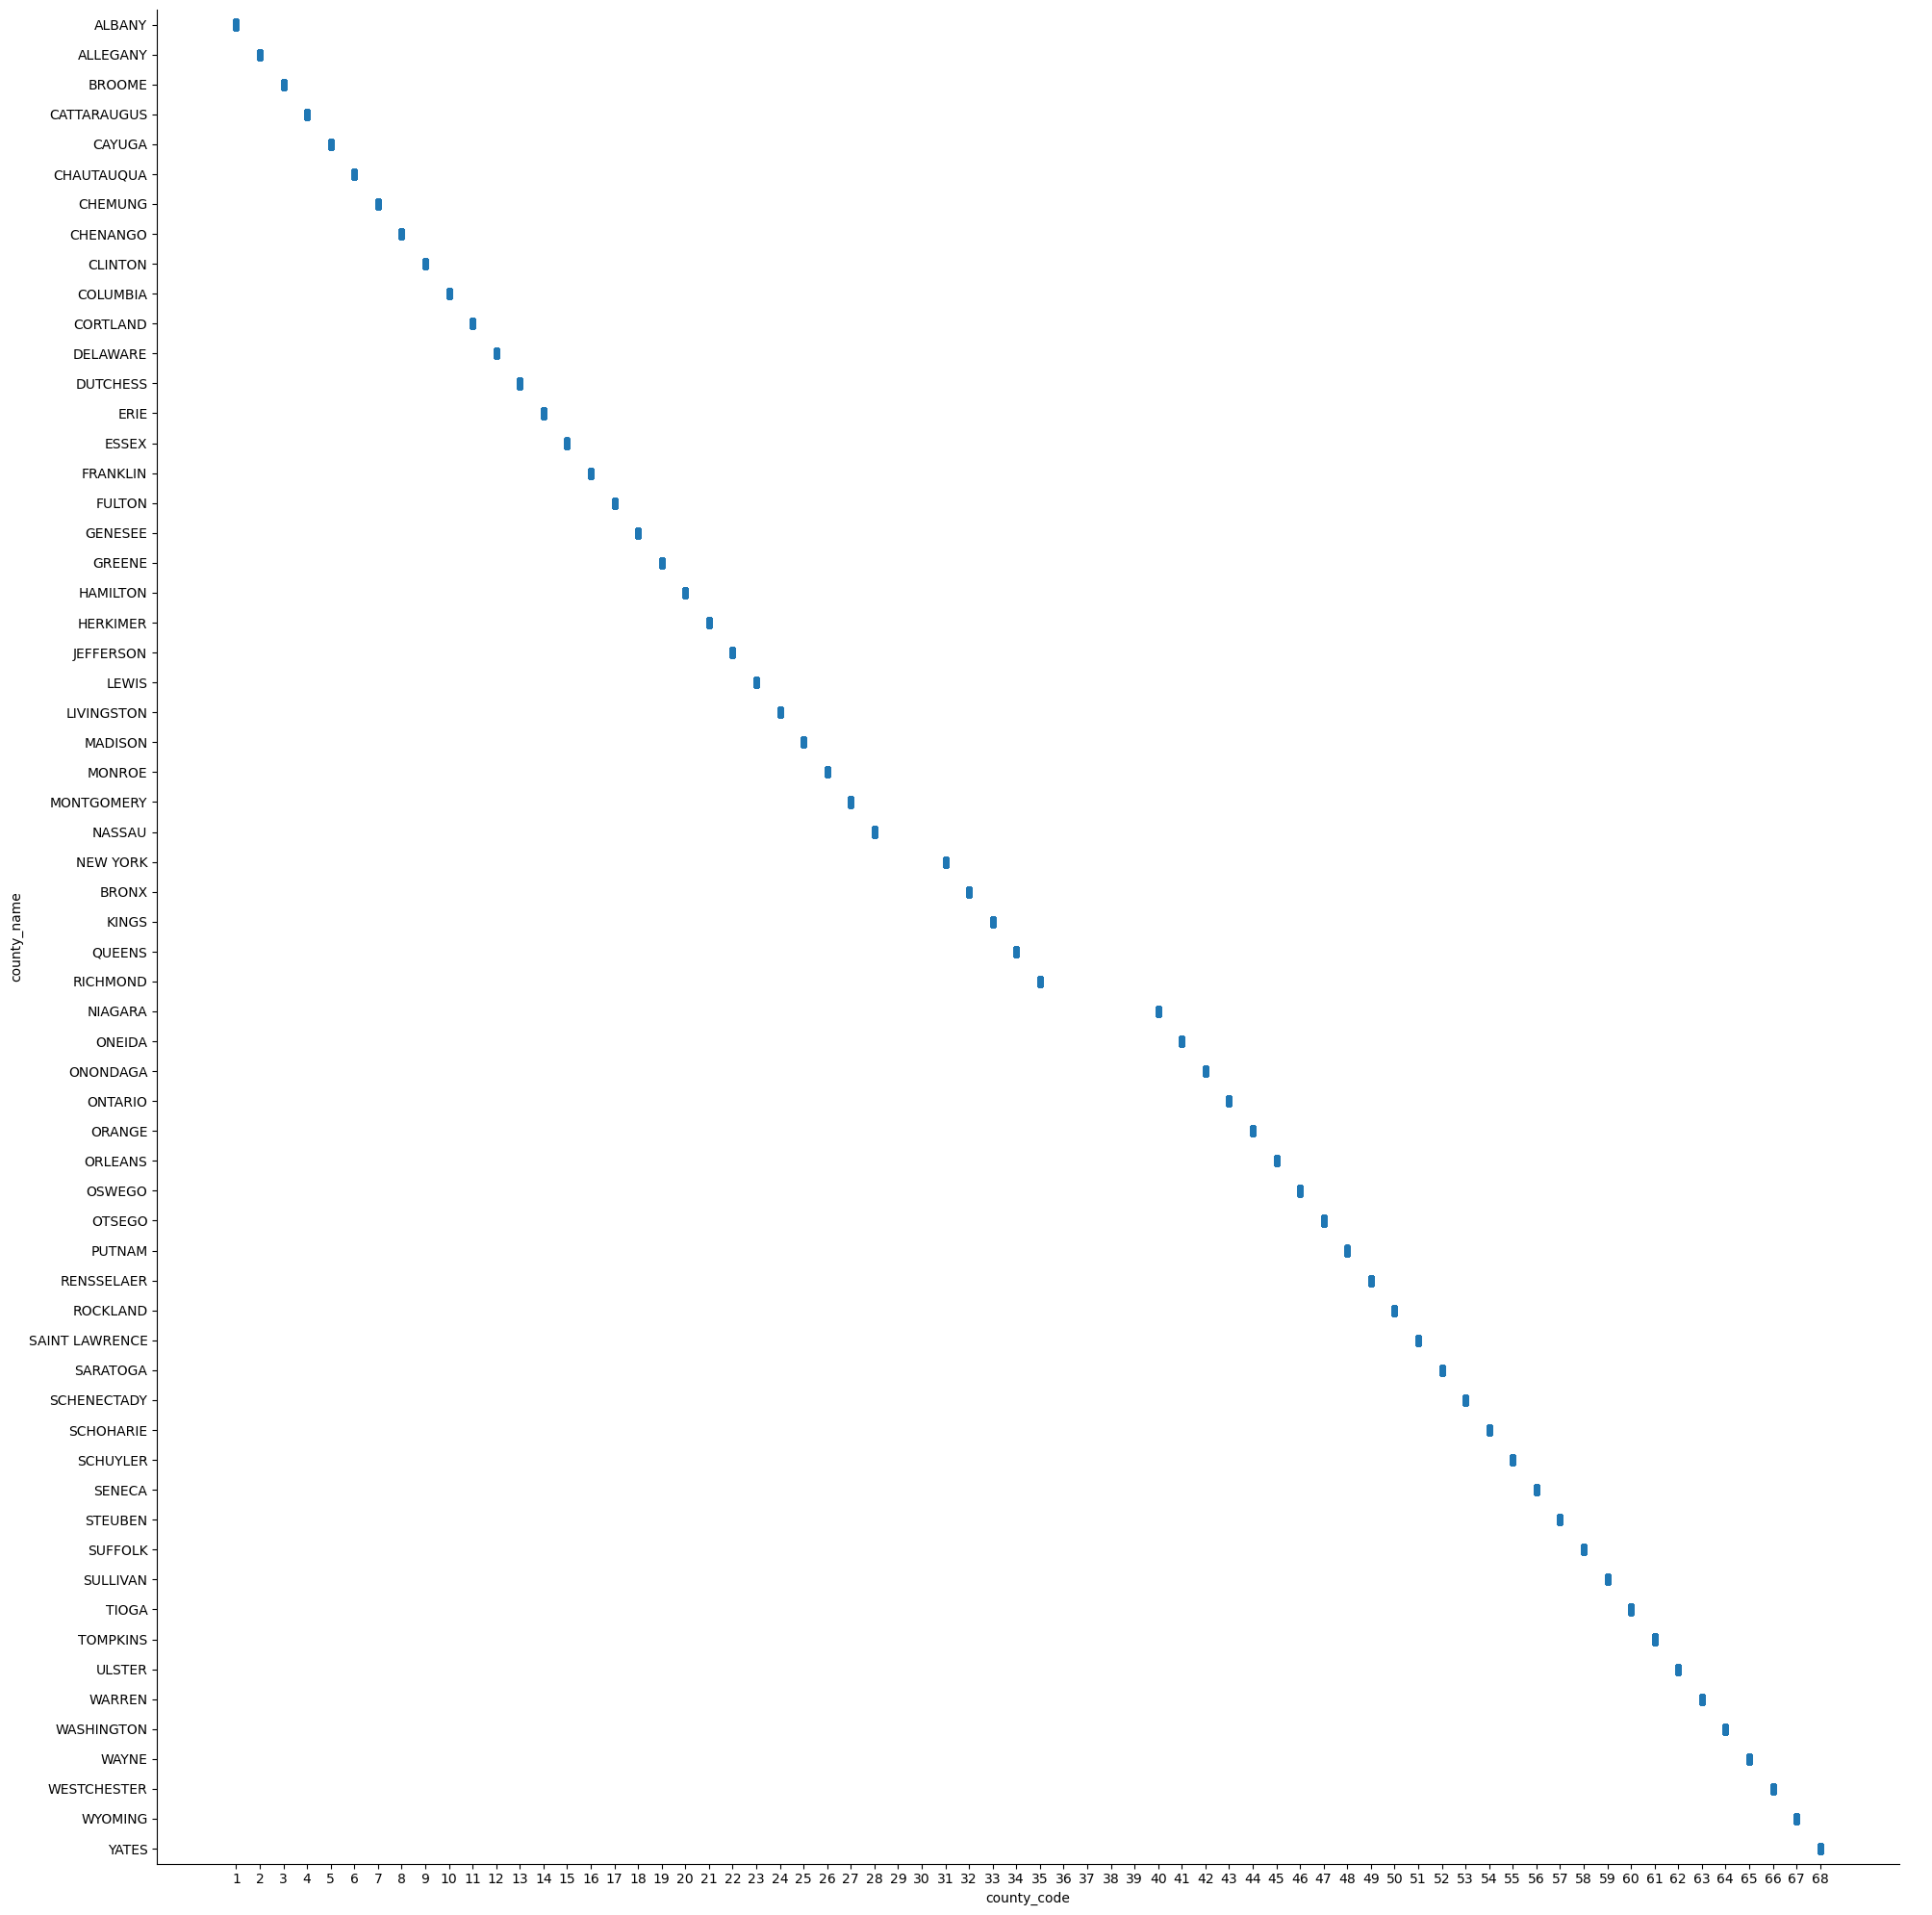

In [351]:
import numpy as np
g = sns.catplot(data=df, x="county_code", y="county_name", kind='strip', height=20)
g.ax.set_xticks(np.arange(df['county_code'].min(), df['county_code'].max() + 1, 1))
plt.show()

## dropout_pct

In [352]:

df["dropout_pct"].describe()

count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64

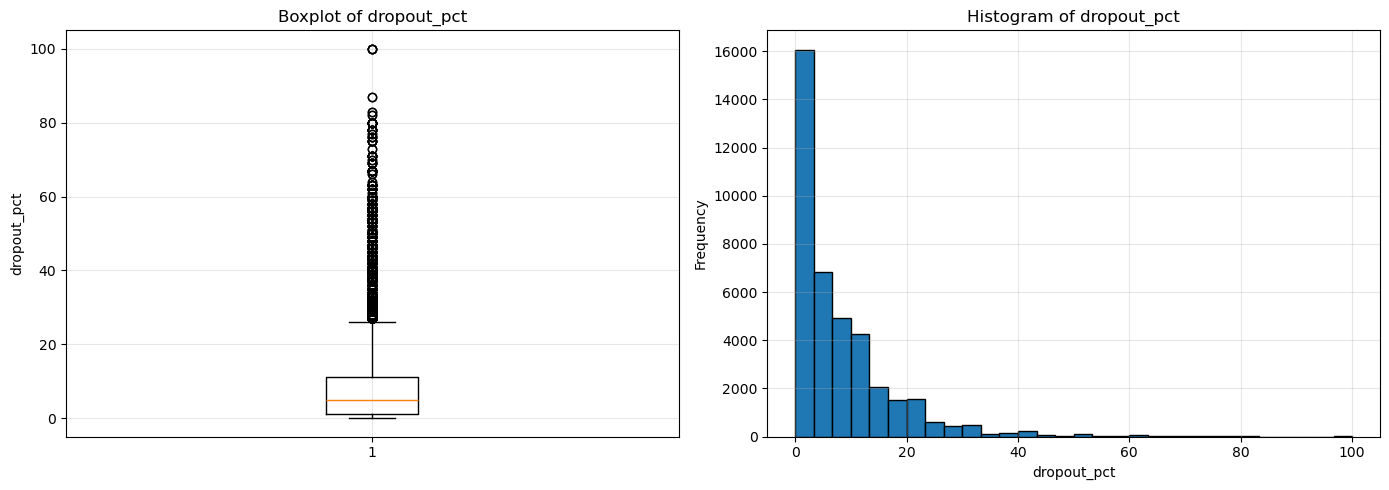

In [353]:
 

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df["dropout_pct"].dropna())
axes[0].set_ylabel('dropout_pct')
axes[0].set_title('Boxplot of dropout_pct')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df["dropout_pct"].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('dropout_pct')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of dropout_pct')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## dropout_cnt

In [354]:
# Convert dropout_cnt to numeric (replace '-' with NaN)

df['dropout_cnt'].describe()

count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64

In [355]:


# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df['dropout_cnt'].dropna())
axes[0].set_ylabel('dropout_cnt')
axes[0].set_title('Boxplot of dropout_cnt')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['dropout_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('dropout_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of dropout_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ged_pct

In [356]:
#ged_pct
df['ged_pct'].describe()

count    39674.000000
mean         0.612693
std          1.985445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         67.000000
Name: ged_pct, dtype: float64

## ged_cnt

In [357]:
#ged_cnt
df['ged_cnt'].describe()

count    39674.000000
mean         1.377577
std          4.949389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         97.000000
Name: ged_cnt, dtype: float64

## still_enr_pct

In [358]:
#still_enr_pct
df['still_enr_pct'].describe()

count    39674.000000
mean         5.190704
std          8.832710
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        100.000000
Name: still_enr_pct, dtype: float64

## still_enr_cnt

In [359]:
#still_enr_cnt
df['still_enr_cnt'].describe()

count    39674.000000
mean        11.299516
std         40.766672
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64

## non_diploma_credential_pct

In [360]:
#non_diploma_credential_pct
df['non_diploma_credential_pct'].describe()

count    39674.000000
mean         1.742627
std          4.063987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         67.000000
Name: non_diploma_credential_pct, dtype: float64

## non_diploma_credential_cnt

In [361]:
#non_diploma_credential_cnt
df['non_diploma_credential_cnt'].describe()

count    39674.000000
mean         1.924485
std          6.498913
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64

In [362]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['non_diploma_credential_cnt'].dropna())
axes[0].set_ylabel('non_diploma_credential_cnt')
axes[0].set_title('Boxplot of non_diploma_credential_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['non_diploma_credential_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('non_diploma_credential_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of non_diploma_credential_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## reg_avg_pct

In [363]:
#reg_adv_pct
df['reg_adv_pct'].describe()

count    39674.000000
mean        32.577204
std         23.001197
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max        100.000000
Name: reg_adv_pct, dtype: float64

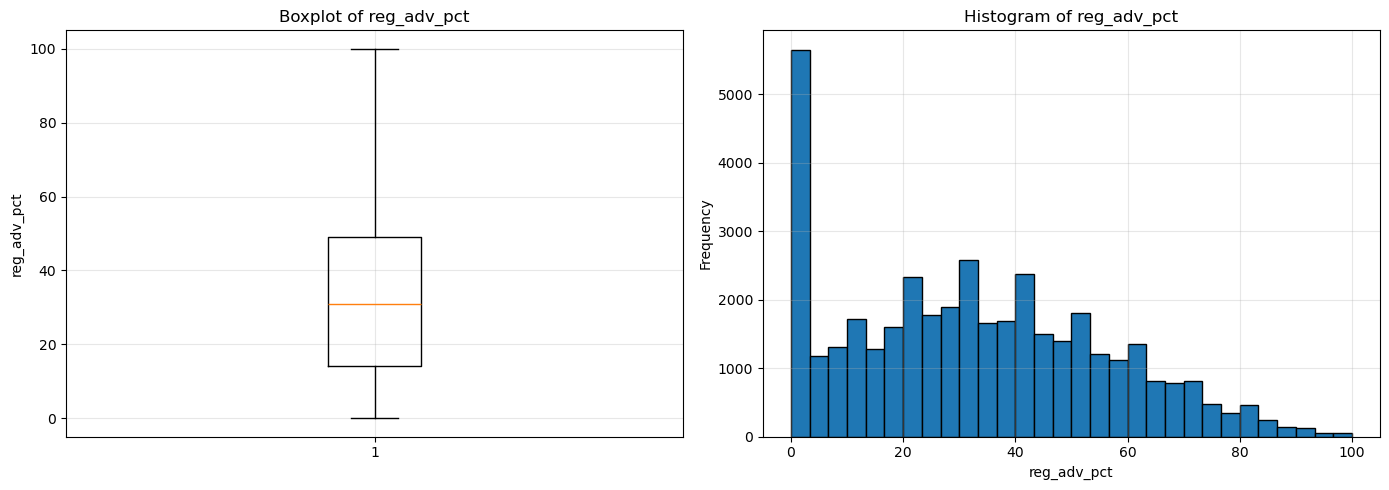

In [364]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['reg_adv_pct'].dropna())
axes[0].set_ylabel('reg_adv_pct')
axes[0].set_title('Boxplot of reg_adv_pct')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['reg_adv_pct'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('reg_adv_pct')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of reg_adv_pct')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## reg_avg_cnt

In [365]:
#reg_adv_cnt
df['reg_adv_cnt'].describe()

count    39674.000000
mean        62.032742
std        132.777866
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64

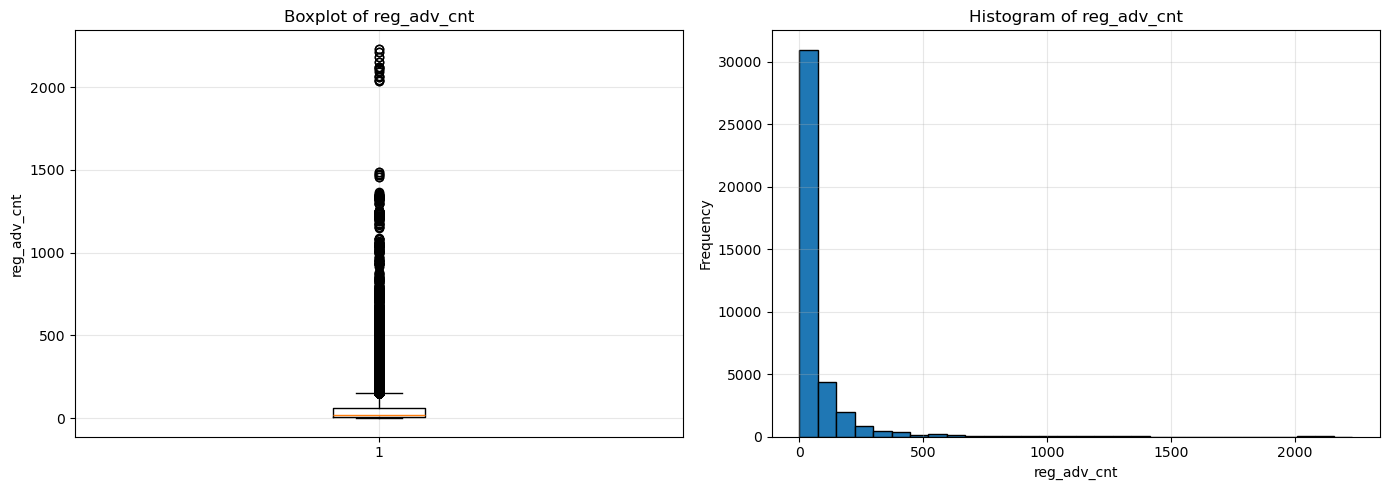

In [366]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['reg_adv_cnt'].dropna())
axes[0].set_ylabel('reg_adv_cnt')
axes[0].set_title('Boxplot of reg_adv_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['reg_adv_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('reg_adv_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of reg_adv_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## reg_pct

In [367]:
#reg_pct
df['reg_pct'].describe()

count    39674.000000
mean        43.371125
std         17.124891
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: reg_pct, dtype: float64

In [368]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['reg_pct'].dropna())
axes[0].set_ylabel('reg_pct')
axes[0].set_title('Boxplot of reg_pct')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['reg_pct'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('reg_pct')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of reg_pct')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## reg_cnt

In [369]:
#reg_cnt
df['reg_cnt'].describe()

count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64

In [370]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['reg_cnt'].dropna())
axes[0].set_ylabel('reg_cnt')
axes[0].set_title('Boxplot of reg_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['reg_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('reg_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of reg_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## local_pct

In [371]:
#local_pct
df['local_pct'].describe()

count    39674.000000
mean         8.479936
std         10.398486
min          0.000000
25%          2.000000
50%          6.000000
75%         11.000000
max        100.000000
Name: local_pct, dtype: float64

In [372]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['local_pct'].dropna())
axes[0].set_ylabel('local_pct')
axes[0].set_title('Boxplot of local_pct')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['local_pct'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('local_pct')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of local_pct')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## local_cnt

In [373]:
#local_cnt
df['local_cnt'].describe()

count    39674.000000
mean        12.340903
std         32.046302
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64

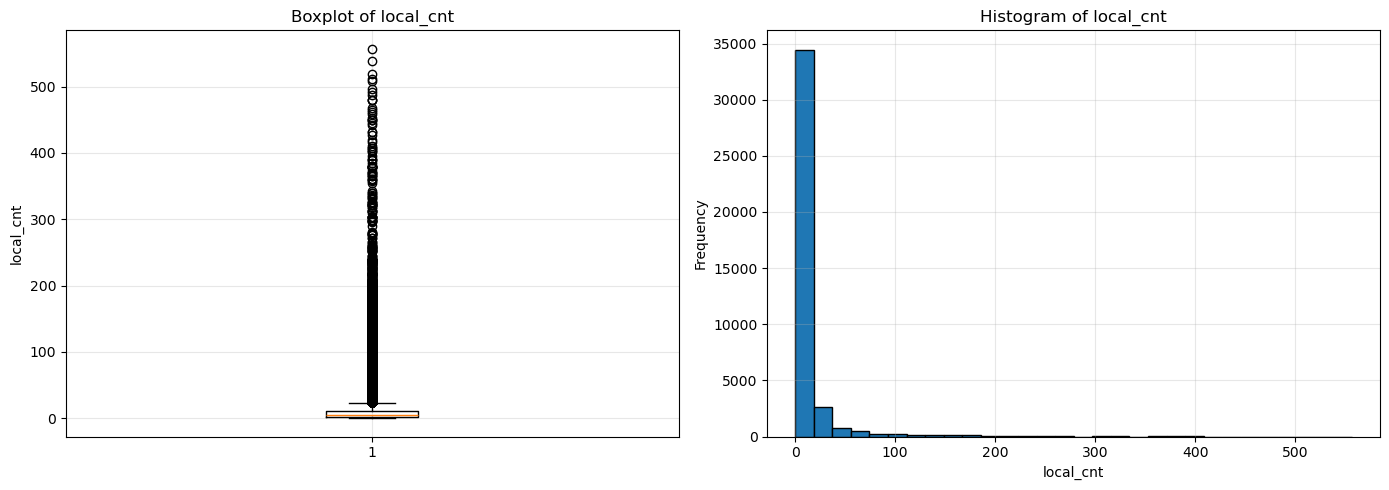

In [374]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['local_cnt'].dropna())
axes[0].set_ylabel('local_cnt')
axes[0].set_title('Boxplot of local_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['local_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('local_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of local_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## grad_pct

In [375]:
#grad_pct
df['grad_pct'].describe()

count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64

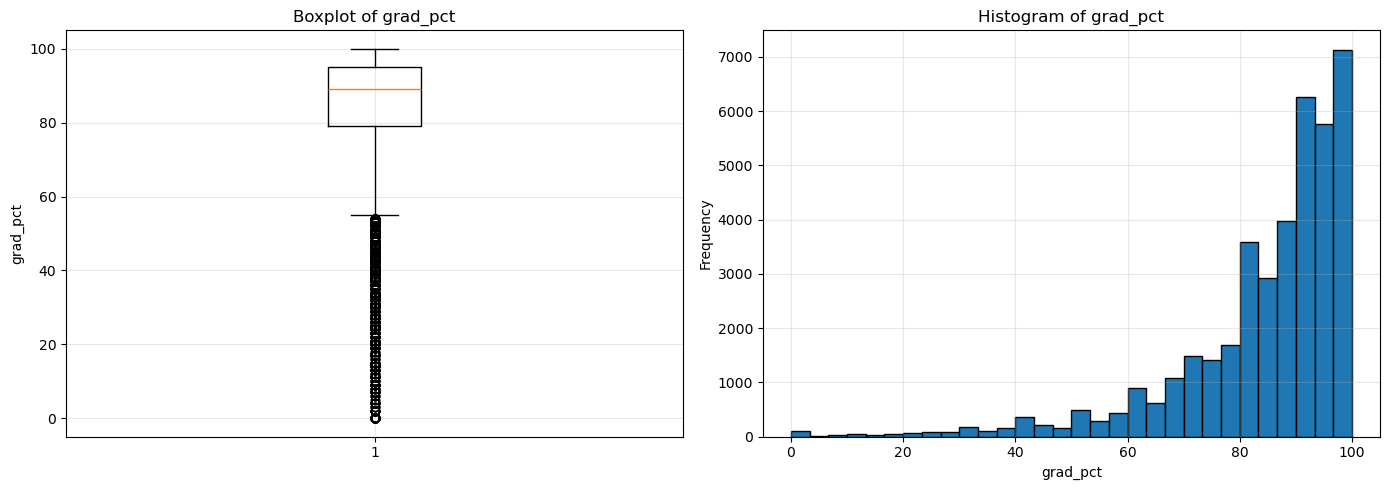

In [376]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['grad_pct'].dropna())
axes[0].set_ylabel('grad_pct')
axes[0].set_title('Boxplot of grad_pct')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['grad_pct'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('grad_pct')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of grad_pct')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## grad_cnt

In [377]:
#grad_cnt
df['grad_cnt'].describe()

count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64

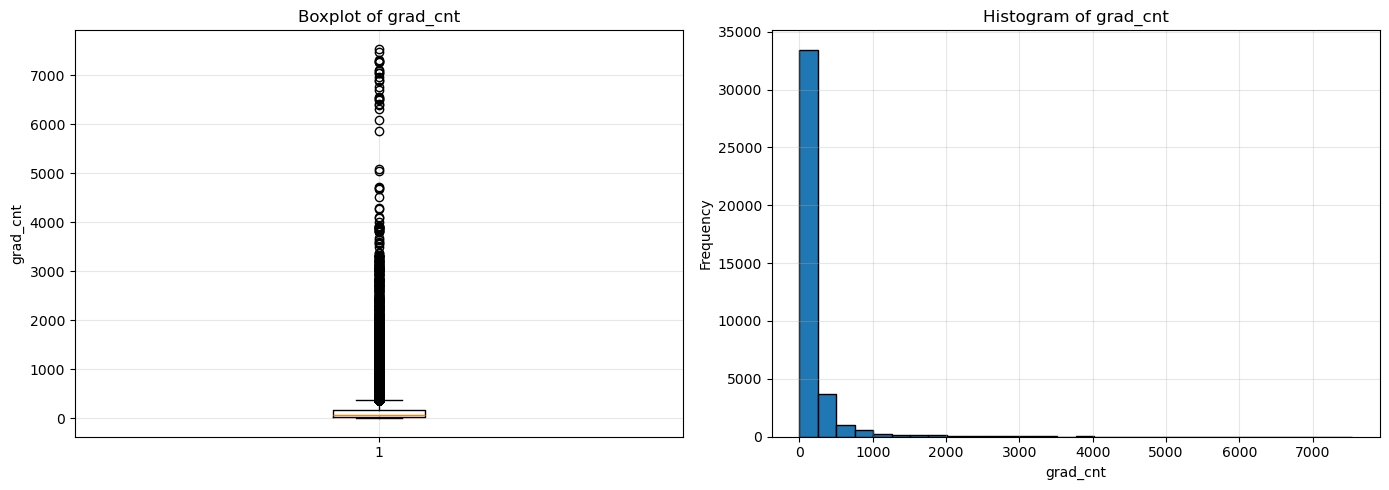

In [378]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(df['grad_cnt'].dropna())
axes[0].set_ylabel('grad_cnt')
axes[0].set_title('Boxplot of grad_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['grad_cnt'].dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('grad_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of grad_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## grad_pct & grad_cnt

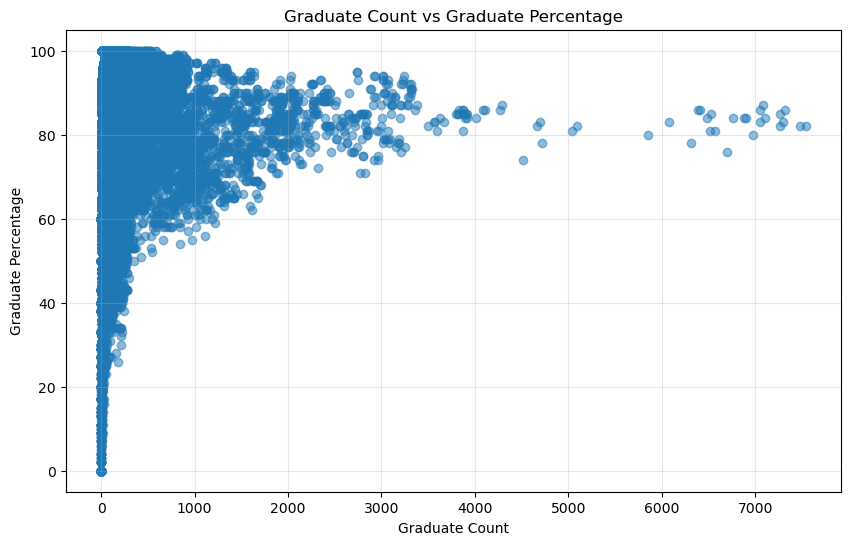

Correlation Matrix:
          grad_cnt  grad_pct
grad_cnt  1.000000  0.034515
grad_pct  0.034515  1.000000


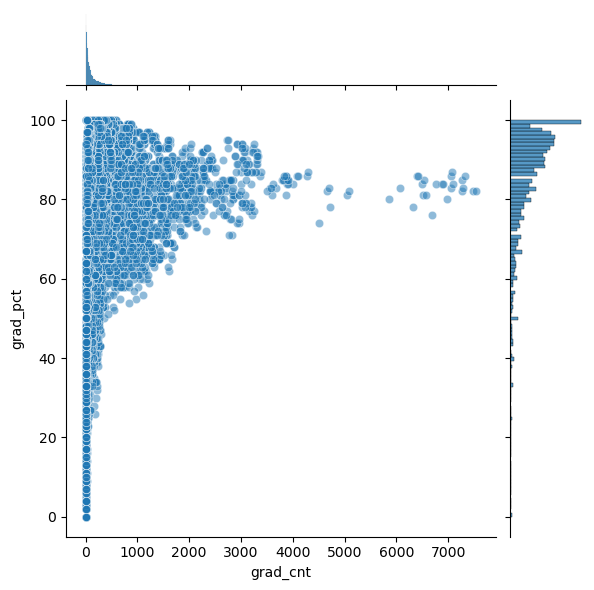


Summary Statistics:
           grad_cnt      grad_pct
count  39674.000000  39674.000000
mean     161.178354     84.406614
std      361.294773     15.679500
min        0.000000      0.000000
25%       20.000000     79.000000
50%       57.000000     89.000000
75%      156.000000     95.000000
max     7540.000000    100.000000


In [379]:
# Scatter plot to see relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['grad_cnt'], df['grad_pct'], alpha=0.5)
plt.xlabel('Graduate Count')
plt.ylabel('Graduate Percentage')
plt.title('Graduate Count vs Graduate Percentage')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation
correlation = df[['grad_cnt', 'grad_pct']].corr()
print("Correlation Matrix:")
print(correlation)

# Joint plot with distributions
sns.jointplot(data=df, x='grad_cnt', y='grad_pct', kind='scatter', alpha=0.5)
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(df[['grad_cnt', 'grad_pct']].describe())

## enroll_cnt

In [380]:
#enroll_cnt
df['enroll_cnt'].describe()

count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64

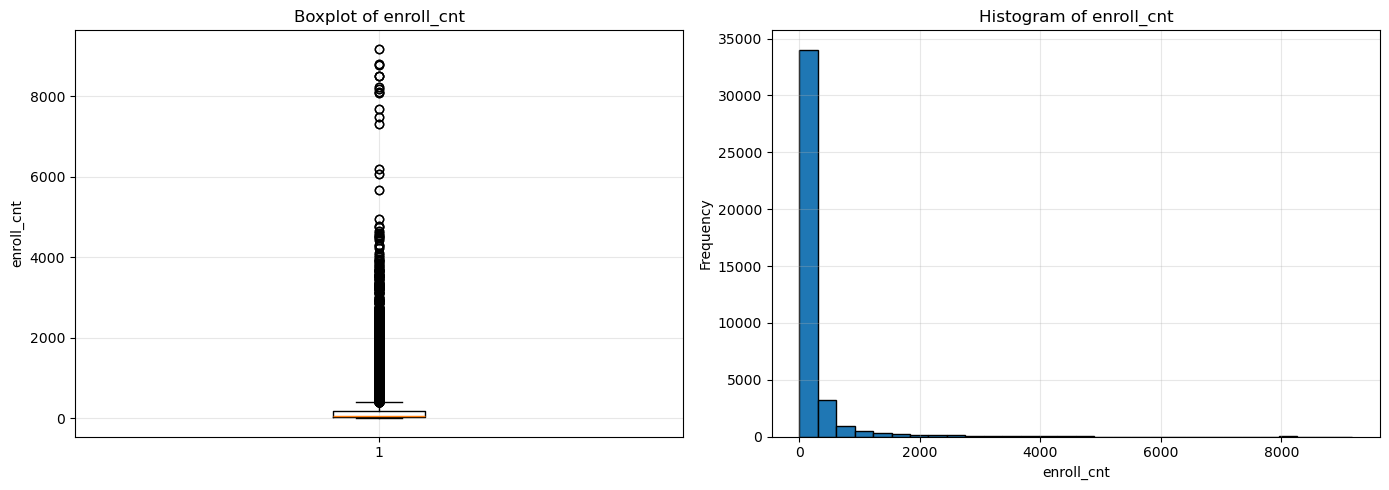

In [381]:
# enroll_cnt
enroll_cnt_numeric = pd.to_numeric(df['enroll_cnt'].replace('-', None), errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(enroll_cnt_numeric.dropna())
axes[0].set_ylabel('enroll_cnt')
axes[0].set_title('Boxplot of enroll_cnt')
axes[0].grid(True, alpha=0.3)

axes[1].hist(enroll_cnt_numeric.dropna(), bins=30, edgecolor='black')
axes[1].set_xlabel('enroll_cnt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of enroll_cnt')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## subgroup_name

In [382]:
#subgroup_name
df['subgroup_name'].describe()

count            73152
unique              24
top       All Students
freq              4074
Name: subgroup_name, dtype: object

In [383]:
subgroup_count = df['subgroup_name'].value_counts()
subgroup_count

subgroup_name
All Students                         4074
Parent Not in Armed Forces           4074
Not Homeless                         4074
Not Migrant                          4074
Not in Foster Care                   4070
Not English Language Learner         4068
Male                                 4068
Female                               4060
General Education Students           4056
White                                4050
Economically Disadvantaged           4046
Students with Disabilities           4028
Not Economically Disadvantaged       4028
Hispanic                             3352
Black                                3066
Asian/Pacific Islander               2752
Homeless                             2702
Multiracial                          2690
English Language Learner             1824
Formerly English Language Learner    1464
American Indian/Alaska Native        1312
In Foster Care                        616
Migrant                               362
Parent in Armed Forc

In [384]:
 # Create bar chart for subgroup_name

plt.figure(figsize=(14, 8))
subgroup_count.plot(kind='bar')
plt.xlabel('Subgroup Name')
plt.ylabel('Count')
plt.title('Distribution of Subgroup Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## subgroup_code

In [385]:
#subgroup_code
df['subgroup_code'].describe()

count    73152.000000
mean        12.000930
std          7.213138
min          1.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         25.000000
Name: subgroup_code, dtype: float64

## membership_desc

In [386]:
#membership_desc
df['membership_desc'].describe()

count                                  73152
unique                                     6
top       2015 Total Cohort - 4 Year Outcome
freq                                   12299
Name: membership_desc, dtype: object

In [387]:
membership_count = df['membership_desc'].value_counts()
membership_count

membership_desc
2015 Total Cohort - 4 Year Outcome                  12299
2015 Total Cohort - 4 Year Outcome - August 2019    12299
2014 Total Cohort - 5 Year Outcome                  12257
2014 Total Cohort - 5 Year Outcome - August 2019    12257
2013 Total Cohort - 6 Year Outcome                  12020
2013 Total Cohort - 6 Year Outcome - August 2019    12020
Name: count, dtype: int64

In [388]:
# Create bar chart for membership_desc
plt.figure(figsize=(14, 6))
membership_count.plot(kind='bar')
plt.xlabel('Membership Description')
plt.ylabel('Count')
plt.title('Distribution of Membership Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## nyc_ind

In [389]:
#nyc_ind
df['nyc_ind'].describe()

count    73152.000000
mean         0.055255
std          0.228479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: nyc_ind, dtype: float64

In [390]:
# Create bar chart for nyc_ind
nyc_ind_counts = df['nyc_ind'].value_counts()
plt.figure(figsize=(8, 6))
nyc_ind_counts.plot(kind='bar')
plt.xlabel('NYC Indicator')
plt.ylabel('Count')
plt.title('Distribution of NYC Indicator')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# enroll_cnt & grad_cnt & still_enr_cnt & dropout_cnt

Overall Correlation Matrix:
               enroll_cnt  grad_cnt  still_enr_cnt  dropout_cnt
enroll_cnt       1.000000  0.993603       0.762840     0.846691
grad_cnt         0.993603  1.000000       0.708722     0.795895
still_enr_cnt    0.762840  0.708722       1.000000     0.662578
dropout_cnt      0.846691  0.795895       0.662578     1.000000


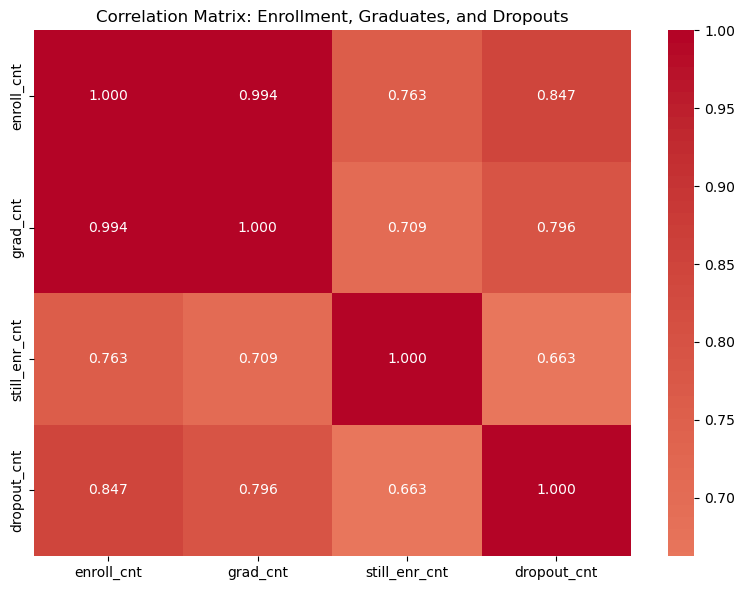

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter out nulls
df_multivariate = df[['subgroup_name', 'enroll_cnt', 'grad_cnt', 'dropout_cnt','still_enr_cnt']].dropna()

# 1. Overall correlation (all data combined)
correlation = df_multivariate[['enroll_cnt', 'grad_cnt','still_enr_cnt', 'dropout_cnt']].corr()
print("Overall Correlation Matrix:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix: Enrollment, Graduates, and Dropouts')
plt.tight_layout()
plt.show()

# Removing Unnecessary Cols


In [ ]:
cols_to_keep = [col for col in df.columns if not col.endswith('_pct')]
cols_to_remove = ['report_school_year', 'aggregation_index', 'aggregation_type', 
                  'nrc_code', 'county_code', 'subgroup_code']
cols_to_keep = [col for col in cols_to_keep if col not in cols_to_remove]                

df_with_necessary_cols = df[cols_to_keep].copy()
df_with_necessary_cols.head(10)

aggregation_name                   nrc_desc county_name  \
0  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
1  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
2  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
3  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
4  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
5  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
6  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
7  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
8  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
9  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

   nyc_ind                     membership_desc                  subgroup_name  \
0        0  2013 Total Cohort - 6 Year Outcome                   All Students   
1        0  2013 Total Cohort - 6 Year Outcome                         Female   
2        0  2013 Total Cohort - 6 Year Outcome                           Male   
3        0  2013 Total Cohort - 6 Year Outcome  American Indian/Alaska Native   
4        0  2013 Total Cohort - 6 Year Outcome                          Black   
5        0  2013 Total Cohort - 6 Year Outcome                       Hispanic   
6        0  2013 Total Cohort - 6 Year Outcome         Asian/Pacific Islander   
7        0  2013 Total Cohort - 6 Year Outcome                          White   
8        0  2013 Total Cohort - 6 Year Outcome                    Multiracial   
9        0  2013 Total Cohort - 6 Year Outcome     General Education Students   

   enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  \
0       658.0     464.0       63.0    310.0         91.0   
1       324.0     246.0       30.0    169.0         47.0   
2       334.0     218.0       33.0    141.0         44.0   
3         NaN       NaN        NaN      NaN          NaN   
4       367.0     248.0       42.0    183.0         23.0   
5        98.0      58.0       13.0     40.0          5.0   
6        46.0      38.0        0.0     26.0         12.0   
7       130.0     105.0        6.0     50.0         49.0   
8         NaN       NaN        NaN      NaN          NaN   
9       544.0     415.0       27.0    297.0         91.0   

   non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  
0                        16.0           30.0      0.0        148.0  
1                         2.0           11.0      0.0         65.0  
2                        14.0           19.0      0.0         83.0  
3                         NaN            NaN      NaN          NaN  
4                        10.0           18.0      0.0         91.0  
5                         4.0            8.0      0.0         28.0  
6                         0.0            0.0      0.0          8.0  
7                         2.0            4.0      0.0         19.0  
8                         NaN            NaN      NaN          NaN  
9                         0.0           15.0      0.0        114.0

We removed all the codes as they are the same as their corresponding name cols and we removed all the cols ending in _pct as they are derived from the enroll_cnt and the corresponding _cnt column.

# Handling Missing Values

In [ ]:
# checking null values for different sub groups
pd.set_option('display.max_rows', None)  # Show all rows
df.groupby('subgroup_name')['enroll_cnt'].apply(lambda x: pd.Series({
    'null_count': x.isna().sum(),
    'non_null_count': x.notna().sum(),
    'total': len(x)
}))

subgroup_name                                    
All Students                       null_count          28
                                   non_null_count    4046
                                   total             4074
American Indian/Alaska Native      null_count        1042
                                   non_null_count     270
                                   total             1312
Asian/Pacific Islander             null_count        1630
                                   non_null_count    1122
                                   total             2752
Black                              null_count        1650
                                   non_null_count    1416
                                   total             3066
Economically Disadvantaged         null_count         128
                                   non_null_count    3918
                                   total             4046
English Language Learner           null_count         952
                      